In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
#filter for Malaysia data
malaysia_df = df[df['location'] == 'Malaysia']

malaysia_df[['date', 'new_cases', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']].head()

,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
228618,2020-01-05,0.0,0.0,NaN,NaN
228619,2020-01-06,0.0,0.0,NaN,NaN
228620,2020-01-07,0.0,0.0,NaN,NaN
228621,2020-01-08,0.0,0.0,NaN,NaN
228622,2020-01-09,0.0,0.0,NaN,NaN


<ipython-input-7-3ab1d3d2eeb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_df['date'] = pd.to_datetime(malaysia_df['date'])


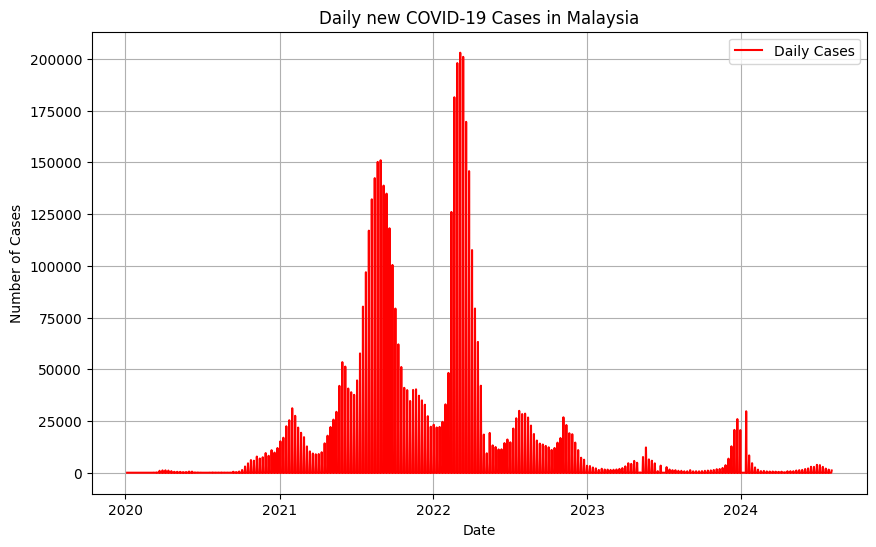

In [7]:
#coverting date to datetime for plotting
malaysia_df['date'] = pd.to_datetime(malaysia_df['date'])

#Plot daily cases
plt.figure(figsize=(10, 6))
plt.plot(malaysia_df['date'], malaysia_df['new_cases'], label='Daily Cases', color = 'red')
plt.title('Daily new COVID-19 Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-8-8bd8c28cb11a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_df['new_cases_7day_avg'] = malaysia_df['new_cases'].rolling(window=7).mean()


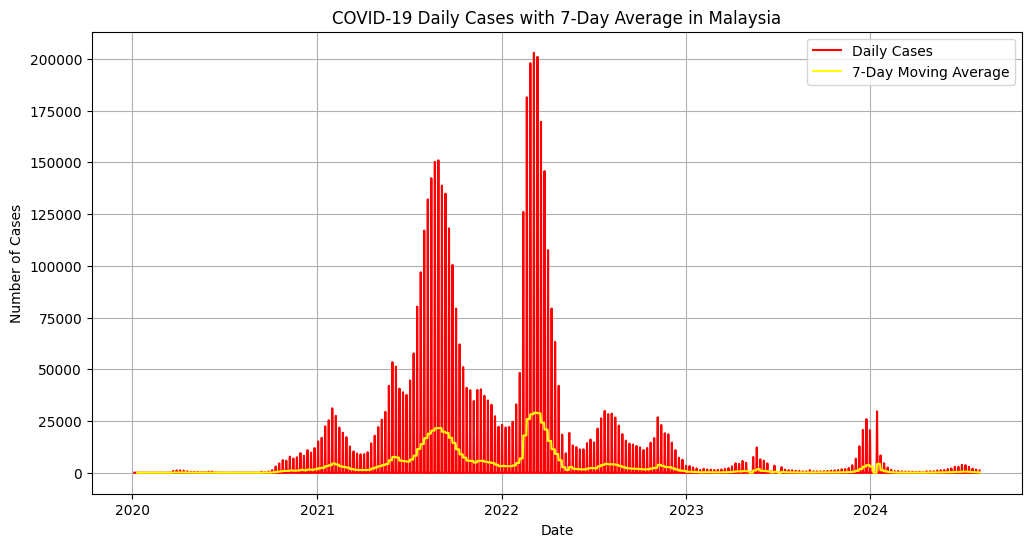

In [8]:
#7-day moving average
malaysia_df['new_cases_7day_avg'] = malaysia_df['new_cases'].rolling(window=7).mean()

#Plotting
plt.figure(figsize=(12,6))
plt.plot(malaysia_df['date'], malaysia_df['new_cases'], label='Daily Cases', color='red')
plt.plot(malaysia_df['date'], malaysia_df['new_cases_7day_avg'], label='7-Day Moving Average', color='yellow')
plt.title('COVID-19 Daily Cases with 7-Day Average in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()



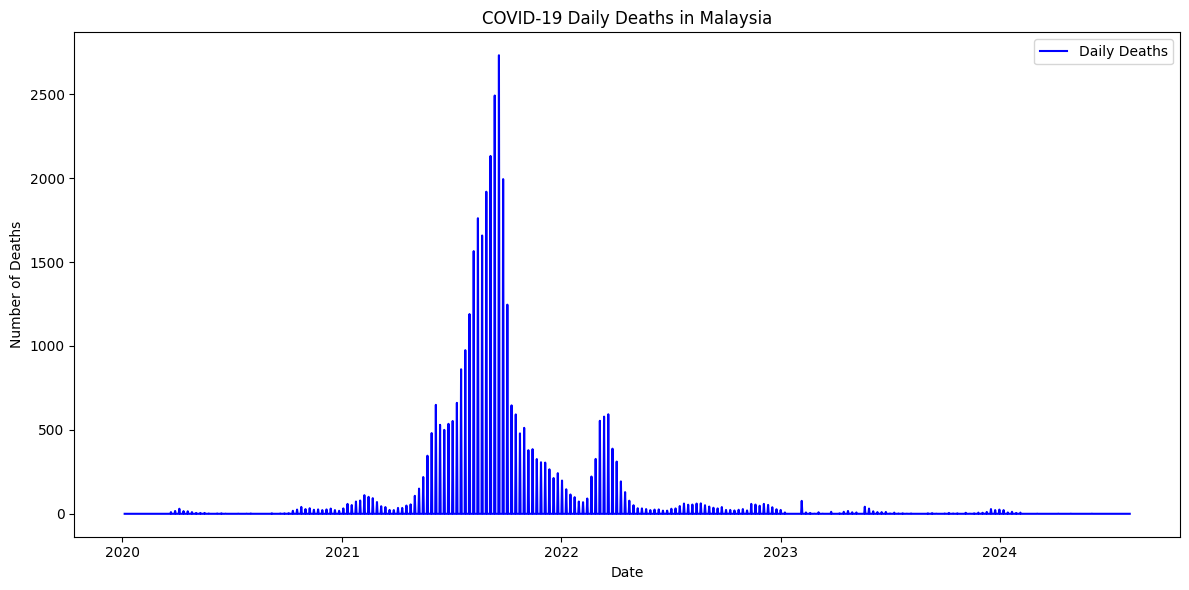

In [10]:
#PLotting daily new deaths
plt.figure(figsize=(12,6))
plt.plot(malaysia_df['date'], malaysia_df['new_deaths'], label='Daily Deaths', color='blue')
plt.title('COVID-19 Daily Deaths in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.tight_layout()
plt.show()

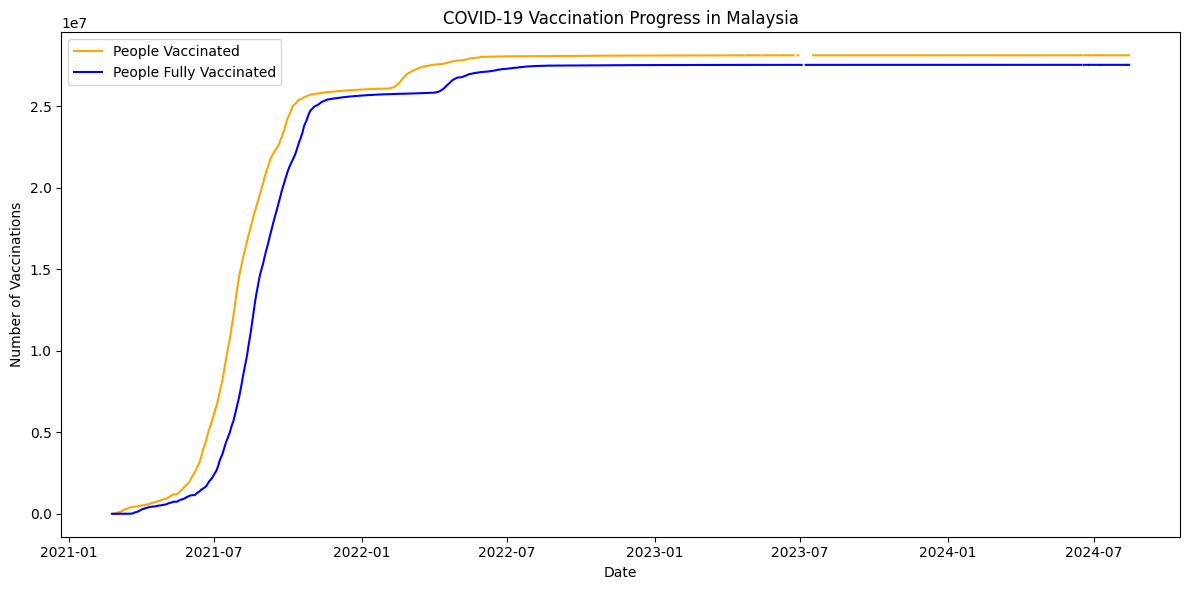

In [13]:
#Vaccination Progress
plt.figure(figsize=(12,6))
plt.plot(malaysia_df['date'], malaysia_df['people_vaccinated'], label='People Vaccinated', color='orange')
plt.plot(malaysia_df['date'], malaysia_df['people_fully_vaccinated'], label='People Fully Vaccinated', color='blue')
plt.title('COVID-19 Vaccination Progress in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

- Daily cases peaked around August 2021, then it started declining
- Vaccination accelerated significantly from mid-2021
- There is a lag between peaks in cases and deaths
- The 7-day avg smooths out unneccesary fluctuations